In [1]:
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import theory_functions

# RCSB 

## 100

In [2]:
data_100 = np.load("../data/rcsb/histogram_100_not_normed.npy", allow_pickle=True)

In [3]:
data_100

array([[178, 176,  84, ...,   0,   0,   0],
       [200, 198,  68, ...,   0,   0,   0],
       [206, 204,  80, ...,   0,   0,   0],
       ...,
       [214, 212, 114, ...,   0,   0,   0],
       [190, 188,  60, ...,   0,   0,   0],
       [170, 168, 124, ...,   0,   0,   0]])

In [4]:
mean_100 = np.mean(data_100, axis=0)

In [5]:
norm_100 = mean_100 / np.sum(mean_100)

In [6]:
np.sum(norm_100)


1.0

In [7]:
lb = np.quantile(data_100, q=0.05, axis=0)

In [8]:
ub = np.quantile(data_100, q=0.95, axis=0)

In [14]:
norm_lb_100 = lb / np.sum(mean_100)
norm_ub_100 = ub / np.sum(mean_100)

In [15]:
x_100 = np.linspace(1, 300, 300)[:-1]

[]

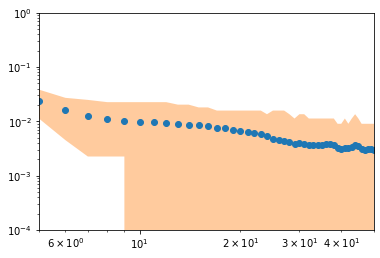

In [17]:
plt.scatter(x_100, norm_100)
plt.fill_between(x_100, norm_ub_100, norm_lb_100, alpha=0.4, zorder=-1)
plt.xlim(5, 50)
plt.ylim(0.0001, 1)
plt.loglog()

# Theory params

In [119]:
d_range = np.arange(0.0014, 0.002, 0.0001)
e_range = np.arange(0, 6, 1)
chain = 100
harmonic = theory_functions.harmonic_number(chain//2)
weights = norm_ub_100 - norm_lb_100


In [292]:
# for i in range(len(d_range)):
#     for j in range(len(e_range)):
#         params_100 = [chain, harmonic, e_range[j], d_range[i]]    
#         plt.plot(x_100[4:50], theory_functions.amino_acid_distance_distribution(x_100[4:50], *params_100), c="r", label=f"d: {d_range[i]}, i: {i}")
#         plt.scatter(x_100, norm_100, label=f"e: {e_range[j]}, j: {j}")
#         plt.fill_between(x_100, norm_ub_100, norm_lb_100, alpha=0.4, zorder=-1)
#         plt.xlim(5, 50)
#         plt.ylim(0.0001, 1)
#         plt.loglog()
#         plt.legend()
#         plt.show()

# Curve fit

In [218]:
parameters, cov = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=weights[4:50],
                                           xdata=x_100[4:50], ydata=norm_100[4:50],
        bounds=([chain - 1, harmonic - 0.00001, e_range[1], d_range[1]],
                [chain, harmonic, e_range[2], d_range[2]]))

print(e_range[1], d_range[1])
print(e_range[2], d_range[2])

1 0.0015
2 0.0016


In [126]:
print(f"chain: {parameters[0]}, H_N/2: {parameters[1]}, e: {parameters[2]}, d: {parameters[3]}")

chain: 99.00000000011471, H_N/2: 4.499205338329422, e: 1.5326445222459155, d: 0.0015000000000089336


(0.001, 0.1)

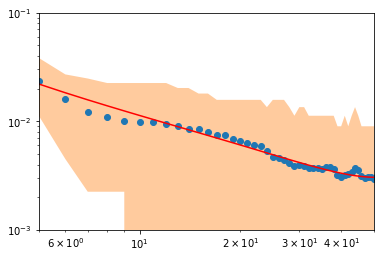

In [127]:
plt.scatter(x_100, norm_100)
plt.fill_between(x_100, norm_ub_100, norm_lb_100, alpha=0.4, zorder=-1)
plt.plot(x_100[4:50], theory_functions.amino_acid_distance_distribution(x_100[4:50], *parameters), c="r")
plt.loglog()
plt.xlim(5, 50)
plt.ylim(0.001, 0.1)

In [128]:
sigma = np.sqrt(np.diag(cov))
sigma 

array([1.34097971e+01, 1.25943279e+00, 7.85944011e-01, 2.87956486e-04])

In [129]:
print(f"chain: {parameters[0]} \pm {sigma[0]}, H_N/2: {parameters[1]} \pm {sigma[1]}, e: {parameters[2]} \pm {sigma[2]}, d: {parameters[3]} \pm {sigma[3]}")

chain: 99.00000000011471 \pm 13.409797061316446, H_N/2: 4.499205338329422 \pm 1.2594327934896594, e: 1.5326445222459155 \pm 0.7859440106218223, d: 0.0015000000000089336 \pm 0.0002879564861935117


# AlphaFold 100 with RCSB fit

[]

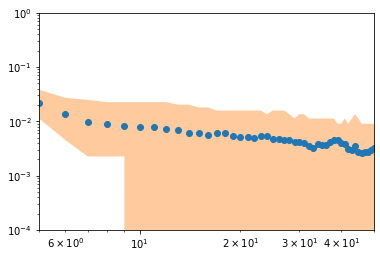

In [130]:
af_data_100 = np.load("../data/alphafold/histogram_100_not_normed.npy", allow_pickle=True)
af_mean_100 = np.mean(af_data_100, axis=0)
af_norm_100 = af_mean_100 / np.sum(af_mean_100)
af_lb = np.quantile(data_100, q=0.05, axis=0)
af_ub = np.quantile(data_100, q=0.95, axis=0)
af_norm_lb = af_lb / np.sum(af_mean_100)
af_norm_ub = af_ub / np.sum(af_mean_100)
af_weights = af_norm_ub - af_norm_lb
af_x = np.linspace(1, 300, 300)[:-1]
plt.scatter(af_x, af_norm_100)
plt.fill_between(af_x, af_norm_ub, af_norm_lb, alpha=0.4, zorder=-1)
plt.xlim(5, 50)
plt.ylim(0.0001, 1)
plt.loglog()

(0.001, 0.1)

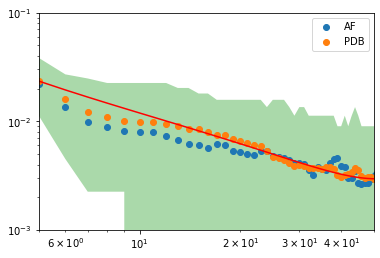

In [34]:
plt.scatter(af_x, af_norm_100, label="AF")
plt.scatter(x_100, norm_100, label="PDB")
plt.fill_between(af_x, af_norm_ub, af_norm_lb, alpha=0.4, zorder=-1)
plt.plot(x_100[4:50], theory_functions.amino_acid_distance_distribution(x_100[4:50], *parameters), c="r")
plt.loglog()
plt.xlim(5, 50)
plt.legend()
plt.ylim(0.001, 0.1)

# KS Test AlphaFold 100 vs RCSB 100

In [293]:
ks = scipy.stats.ks_2samp(norm_100, af_norm_100, alternative="two-sided", mode="auto")
ks

KstestResult(statistic=0.026755852842809364, pvalue=0.9999298951881165)

# CDF

(0.0, 100.0)

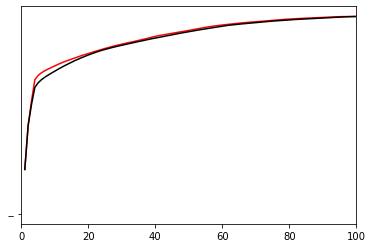

In [306]:
af_cdf = np.cumsum(af_norm_100)
cdf = np.cumsum(norm_100)
plt.plot(af_x, af_cdf, "r", "--")
plt.plot(x_100, cdf, "k")
plt.xlim(0,100)

# Least squares

In [61]:
params = [chain, harmonic, e_range[1], d_range[0]]
lsq_res = scipy.optimize.least_squares(theory_functions.vector_of_residuals, x0=params, args=(x[4:50], norm_100[4:50]))
# print(lsq_res)

# 200


In [163]:
data_200 = np.load("../data/rcsb/histogram_200_not_normed.npy", allow_pickle=True)
mean_200 = np.mean(data_200, axis=0)
norm_200 = mean_200 / np.sum(mean_200)
lb_200 = np.quantile(data_200, q=0.05, axis=0)
ub_200 = np.quantile(data_200, q=0.95, axis=0)
norm_lb_200 = lb_200 / np.sum(mean_200)
norm_ub_200 = ub_200 / np.sum(mean_200)
x_200 = np.linspace(1, 300, 300)[:-1]

[]

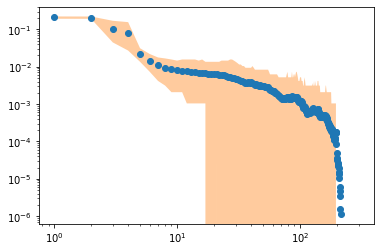

In [164]:
plt.scatter(x_200, norm_200)
plt.fill_between(x_200, norm_ub_200, norm_lb_200, alpha=0.4, zorder=-1)
# plt.xlim(5, 100)
# plt.ylim(0.0001, 1)
plt.loglog()

## Theory parameters 200

In [167]:
d_range_200 = np.arange(0.0002, 0.0010, 0.0001)
e_range_200 = np.arange(0, 6, 1)
chain_200 = 200
harmonic_200 = theory_functions.harmonic_number(chain_200//2)
weights_200 = norm_ub_200 - norm_lb_200

In [168]:
# weights_200[4:100]

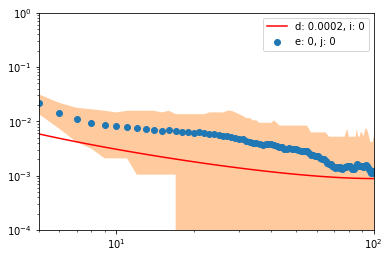

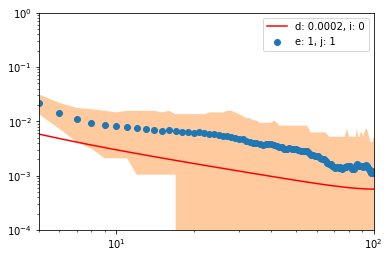

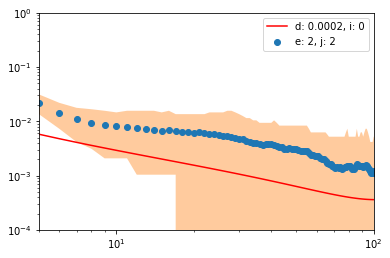

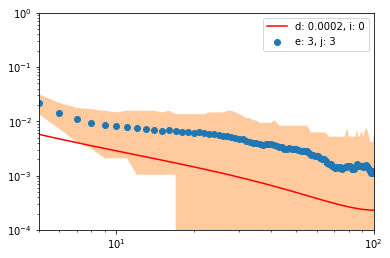

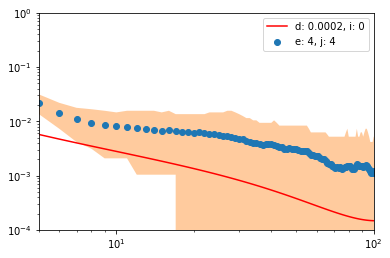

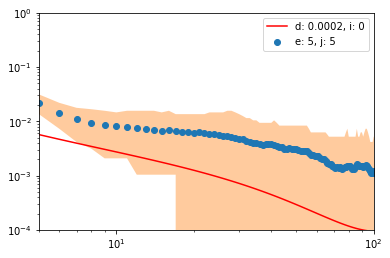

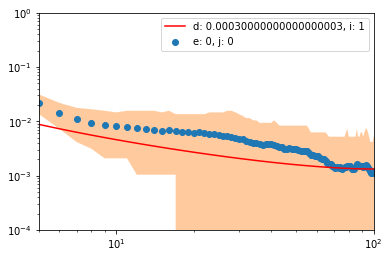

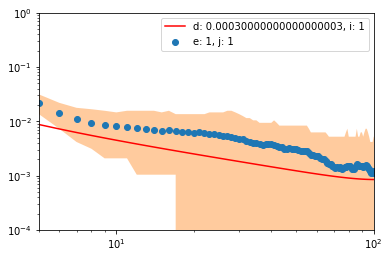

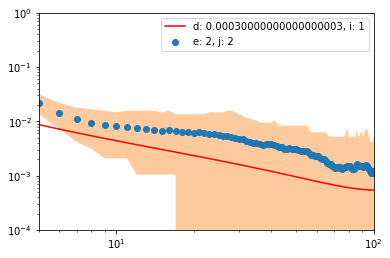

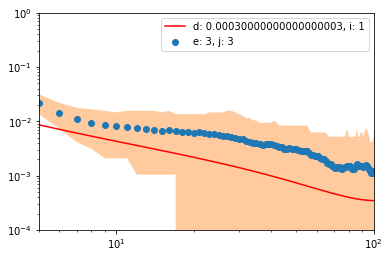

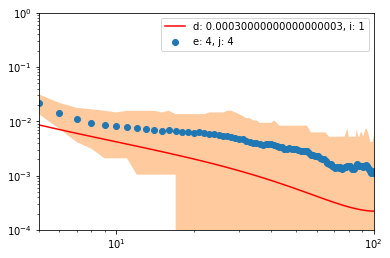

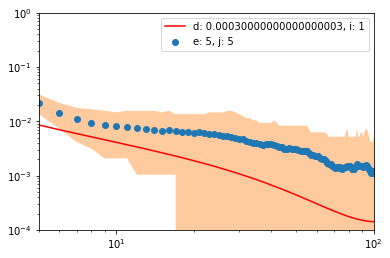

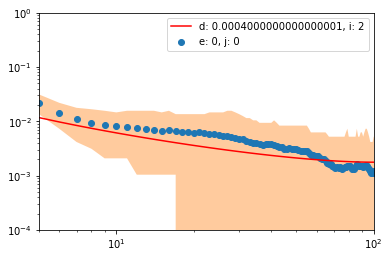

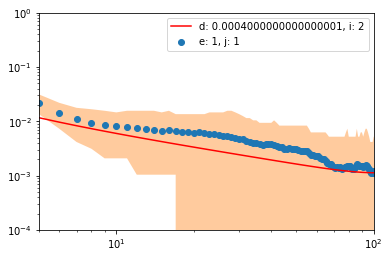

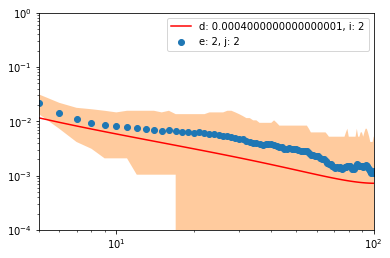

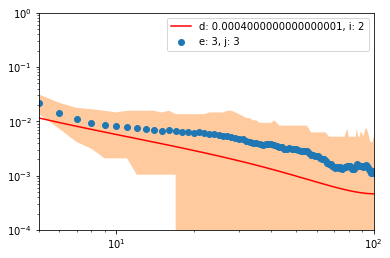

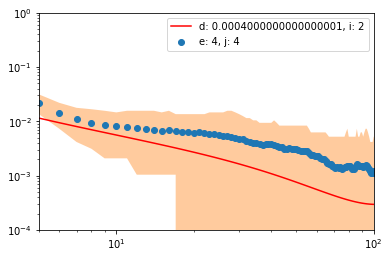

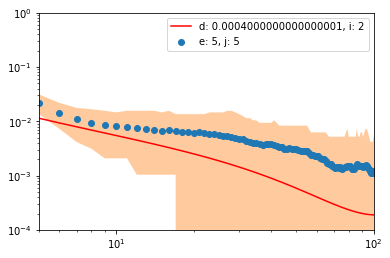

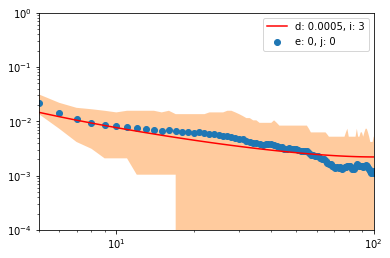

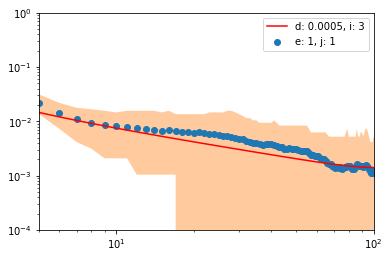

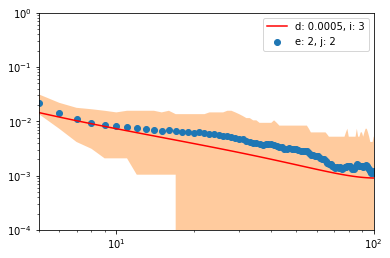

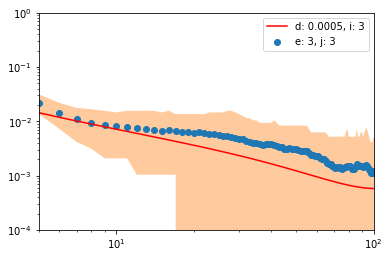

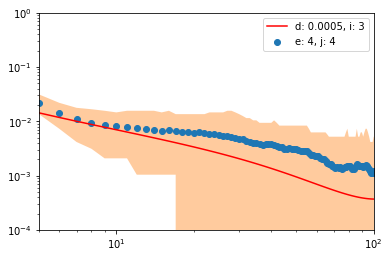

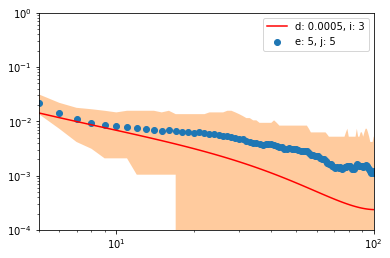

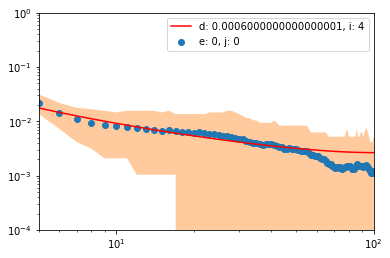

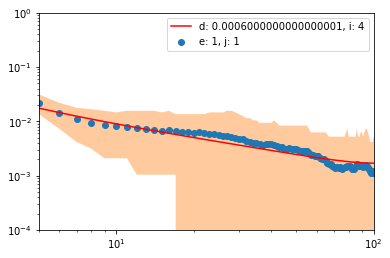

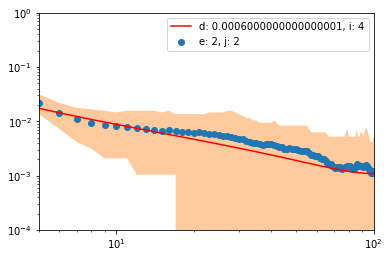

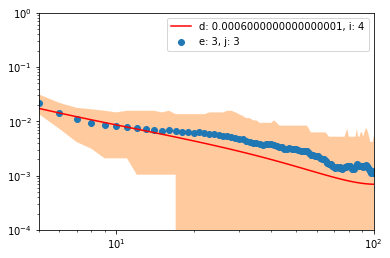

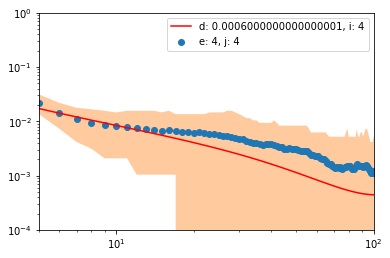

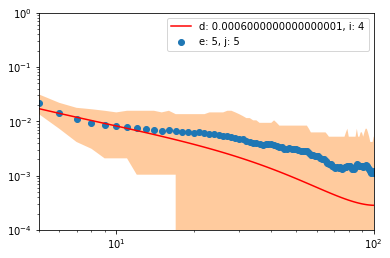

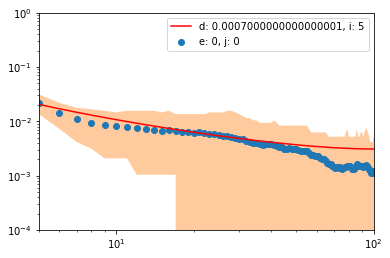

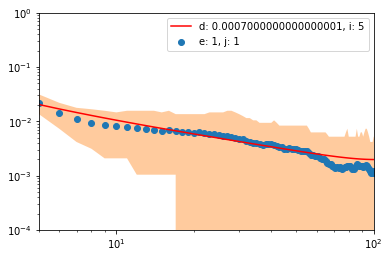

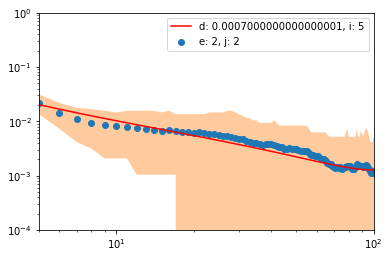

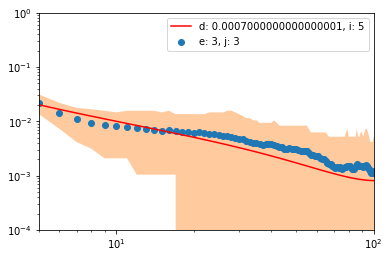

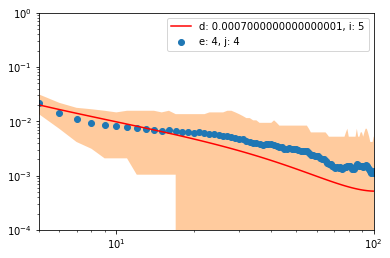

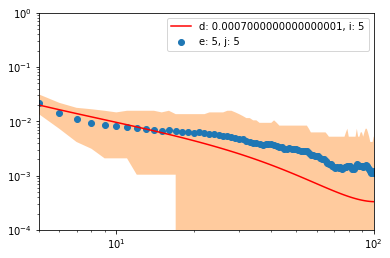

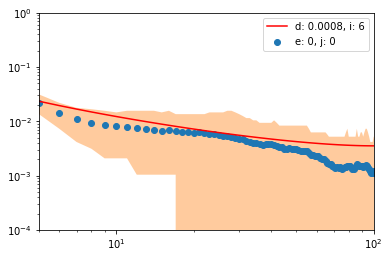

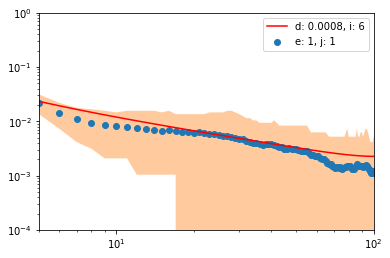

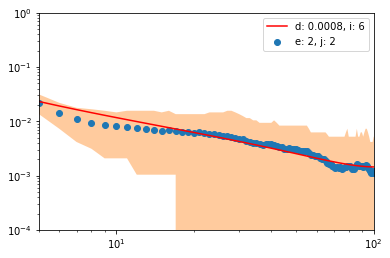

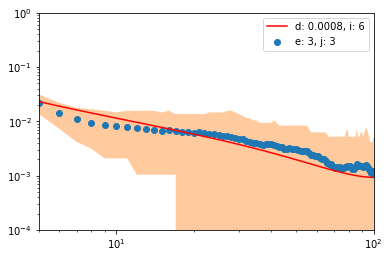

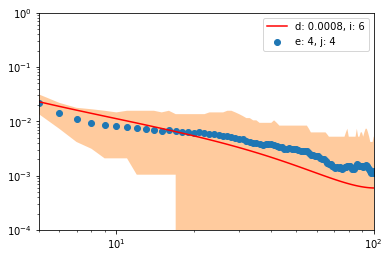

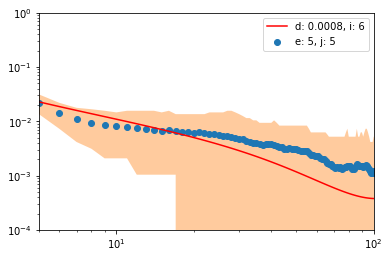

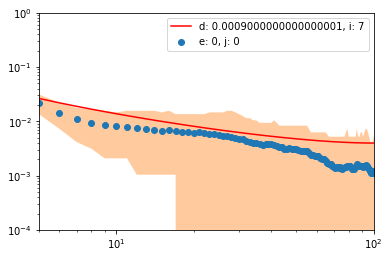

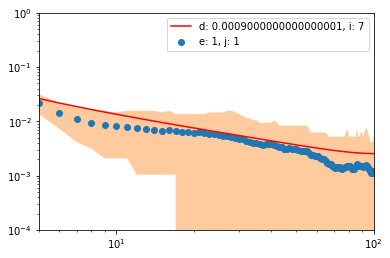

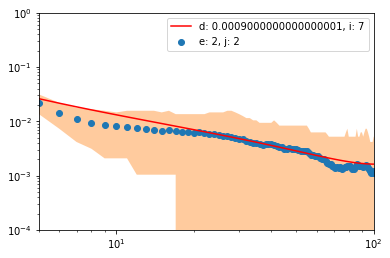

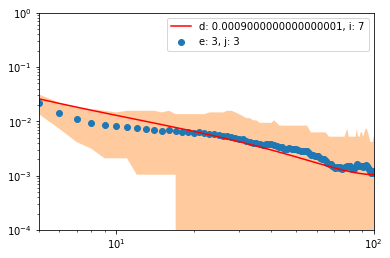

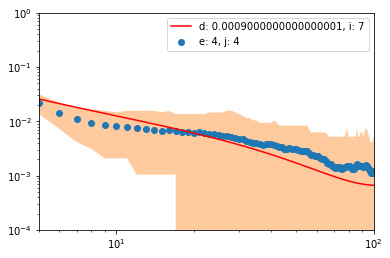

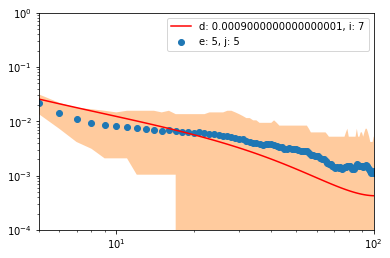

In [169]:
for i in range(len(d_range_200)):
    for j in range(len(e_range_200)):
        params_200 = [chain_200, harmonic_200, e_range_200[j], d_range_200[i]]    
        plt.plot(x_200[4:100], theory_functions.amino_acid_distance_distribution(x_200[4:100], *params_200), c="r", label=f"d: {d_range_200[i]}, i: {i}")
        plt.scatter(x_200, norm_200, label=f"e: {e_range_200[j]}, j: {j}")
        plt.fill_between(x_200, norm_ub_200, norm_lb_200, alpha=0.4, zorder=-1)
        plt.xlim(5, 100)
        plt.ylim(0.0001, 1)
        plt.loglog()
        plt.legend()
        plt.show()

# Curve fit

In [220]:
parameters_200, cov_200 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=weights_200[4:100],
                                           xdata=x_200[4:100], ydata=norm_200[4:100],
        bounds=([chain_200 - 1, harmonic_200 - 0.00001, e_range_200[2], d_range_200[6]],
                [chain_200, harmonic_200, e_range_200[3], d_range_200[7]]))
print(e_range_200[2], d_range_200[6])
print(e_range_200[3], d_range_200[7])

2 0.0008
3 0.0009000000000000001


In [180]:
parameters_200

array([1.99000000e+02, 5.18737752e+00, 2.07777525e+00, 8.00000000e-04])

[]

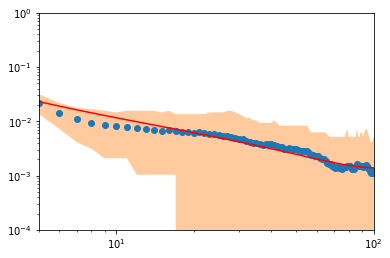

In [181]:
plt.plot(x_200[4:100], theory_functions.amino_acid_distance_distribution(x_200[4:100], *parameters_200), c="r")
plt.scatter(x_200, norm_200)
plt.fill_between(x_200, norm_ub_200, norm_lb_200, alpha=0.4, zorder=-1)
plt.xlim(5, 100)
plt.ylim(0.0001, 1)
plt.loglog()

In [182]:
cov_200

array([[ 7.74425335e+02,  4.58297370e+00, -1.66489435e+00,
        -3.12873983e-03],
       [ 4.58297370e+00,  1.56865898e+00, -7.88701171e-01,
         5.68779860e-05],
       [-1.66489435e+00, -7.88701171e-01,  4.18975494e-01,
        -2.91371526e-05],
       [-3.12873983e-03,  5.68779860e-05, -2.91371526e-05,
         1.68611430e-08]])

In [183]:
sigma_200 = np.sqrt(np.diag(cov_200))

In [184]:
sigma_200

array([2.78284986e+01, 1.25246117e+00, 6.47283164e-01, 1.29850464e-04])

In [185]:
print(f"chain: {parameters_200[0]} \pm {sigma_200[0]}, H_N/2: {parameters_200[1]} \pm {sigma_200[1]}, e: {parameters_200[2]} \pm {sigma_200[2]}, d: {parameters_200[3]} \pm {sigma_200[3]}")

chain: 199.00000000000003 \pm 27.828498616100063, H_N/2: 5.18737751763962 \pm 1.252461167610453, e: 2.077775246113522 \pm 0.6472831640382724, d: 0.0008000000000000026 \pm 0.00012985046404915429


# AlphaFold 200 with RCSB fit

[]

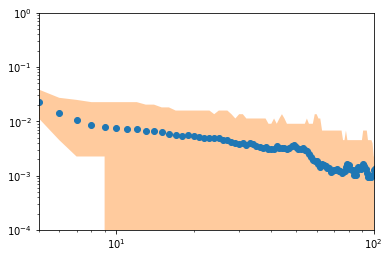

In [308]:
af_data_200 = np.load("../data/alphafold/histogram_200_not_normed.npy", allow_pickle=True)
af_mean_200 = np.mean(af_data_200, axis=0)
af_norm_200 = af_mean_200 / np.sum(af_mean_200)
af_lb = np.quantile(data_200, q=0.05, axis=0)
af_ub = np.quantile(data_200, q=0.95, axis=0)
af_norm_lb_200 = af_lb / np.sum(af_mean_200)
af_norm_ub_200 = af_ub / np.sum(af_mean_200)
af_weights = af_norm_ub - af_norm_lb
af_x = np.linspace(1, 300, 300)[:-1]
plt.scatter(af_x, af_norm_200)
plt.fill_between(af_x, af_norm_ub, af_norm_lb, alpha=0.4, zorder=-1)
plt.xlim(5, 100)
plt.ylim(0.0001, 1)
plt.loglog()

(0.0005, 0.1)

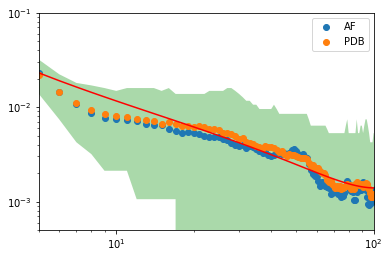

In [187]:
plt.scatter(af_x, af_norm_200, label="AF")
plt.scatter(x_200, norm_200, label="PDB")
plt.fill_between(af_x, af_norm_ub_200, af_norm_lb_200, alpha=0.4, zorder=-1)
plt.plot(af_x[4:100], theory_functions.amino_acid_distance_distribution(x_200[4:100], *parameters_200), c="r")
plt.loglog()
plt.xlim(5, 100)
plt.legend()
plt.ylim(0.0005, 0.1)

# KS AlphaFold 200 vs RCSB 200

In [310]:
ks = scipy.stats.ks_2samp(norm_200, af_norm_200, alternative="two-sided", mode="auto")
ks

KstestResult(statistic=0.07357859531772576, pvalue=0.3937517469638571)

# CDF

(0.0, 200.0)

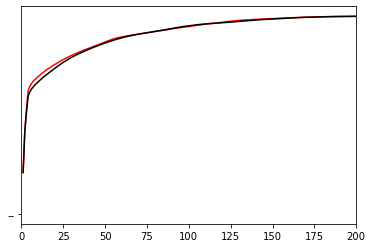

In [309]:
af_cdf_200 = np.cumsum(af_norm_200)
cdf_200 = np.cumsum(norm_200)
plt.plot(af_x, af_cdf_200, "r", "--")
plt.plot(x_200, cdf_200, "k")
plt.xlim(0,200)

# 300

In [188]:
data_300 = np.load("../data/rcsb/histogram_300_not_normed.npy", allow_pickle=True)
mean_300 = np.mean(data_300, axis=0)
norm_300 = mean_300 / np.sum(mean_300)
lb_300 = np.quantile(data_300, q=0.05, axis=0)
ub_300 = np.quantile(data_300, q=0.95, axis=0)
norm_lb_300 = lb_300 / np.sum(mean_300)
norm_ub_300 = ub_300 / np.sum(mean_300)
x_300 = np.linspace(1, 300, 300)[:-1]

[]

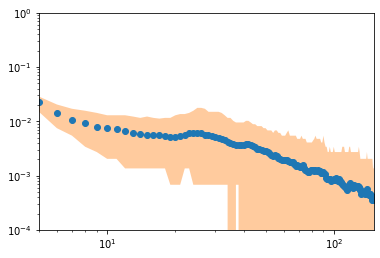

In [189]:
plt.scatter(x_300, norm_300)
plt.fill_between(x_300, norm_ub_300, norm_lb_300, alpha=0.4, zorder=-1)
plt.xlim(5, 150)
plt.ylim(0.0001, 1)
plt.loglog()

## Theory params 300

In [194]:
d_range_300 = np.arange(0.0005, 0.0010, 0.0001)
e_range_300 = np.arange(0, 8, 1)
chain_300 = 300
harmonic_300 = theory_functions.harmonic_number(chain_300//2)
weights_300 = norm_ub_300 - norm_lb_300


In [295]:
# for i in range(len(d_range_300)):
#     for j in range(len(e_range_300)):
#         params_300 = [chain_300, harmonic_300, e_range_300[j], d_range_300[i]]    
#         plt.plot(x_300[4:150], theory_functions.amino_acid_distance_distribution(x_300[4:150], *params_300), c="r", label=f"d: {d_range_300[i]}, i: {i}")
#         plt.scatter(x_300, norm_300, label=f"e: {e_range_300[j]}, j: {j}")
#         plt.fill_between(x_300, norm_ub_300, norm_lb_300, alpha=0.4, zorder=-1)
#         plt.xlim(5, 150)
#         plt.ylim(0.0001, 1)
#         plt.loglog()
#         plt.legend()
#         plt.show()

[]

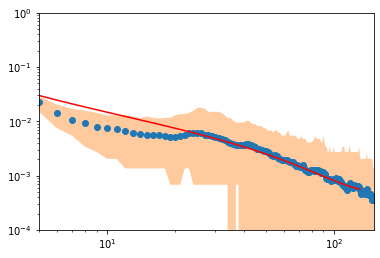

In [106]:
plt.plot(x_300[4:130], theory_functions.amino_acid_distance_distribution(x_300[4:130], *params_300), c="r")
plt.scatter(x_300, norm_300)
plt.fill_between(x_300, norm_ub_300, norm_lb_300, alpha=0.4, zorder=-1)
plt.xlim(5, 150)
plt.ylim(0.0001, 1)
plt.loglog()

In [221]:
parameters_300, cov_300 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=weights_300[4:130],
                                           xdata=x_300[4:130], ydata=norm_300[4:130],
        bounds=([chain_300 - 1, harmonic_300 - 0.00001, e_range_300[4], d_range_300[2]],
                [chain_300, harmonic_300, e_range_300[5], d_range_300[3]]))
print(e_range_300[4], d_range_300[2])
print(e_range_300[5], d_range_300[3])

4 0.0007000000000000001
5 0.0008000000000000001


In [201]:
sigma_300 = np.sqrt(np.diag(cov_300))

In [202]:
print(f"chain: {parameters_300[0]} \pm {sigma_300[0]}, H_N/2: {parameters_300[1]} \pm {sigma_300[1]}, e: {parameters_300[2]} \pm {sigma_300[2]}, d: {parameters_300[3]} \pm {sigma_300[3]}")

chain: 299.00000000000006 \pm 110.04667896148138, H_N/2: 5.59118058864388 \pm 1.8899284831994043, e: 4.088239688712197 \pm 0.835554703429808, d: 0.0007000000000000002 \pm 0.0002231827657039304


# AlphaFold 300 with RCSB fit

[]

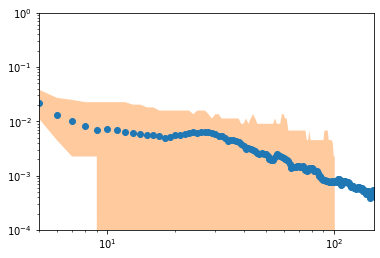

In [311]:
af_data_300 = np.load("../data/alphafold/histogram_300_not_normed.npy", allow_pickle=True)
af_mean_300 = np.mean(af_data_300, axis=0)
af_norm_300 = af_mean_300 / np.sum(af_mean_300)
af_lb = np.quantile(data_300, q=0.05, axis=0)
af_ub = np.quantile(data_300, q=0.95, axis=0)
af_norm_lb_300 = af_lb / np.sum(af_mean_300)
af_norm_ub_300 = af_ub / np.sum(af_mean_300)
af_weights = af_norm_ub - af_norm_lb
af_x = np.linspace(1, 300, 300)[:-1]
plt.scatter(af_x, af_norm_300)
plt.fill_between(af_x, af_norm_ub, af_norm_lb, alpha=0.4, zorder=-1)
plt.xlim(5, 150)
plt.ylim(0.0001, 1)
plt.loglog()

(0.0001, 0.1)

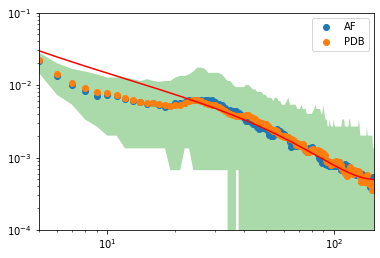

In [204]:
plt.scatter(af_x, af_norm_300, label="AF")
plt.scatter(x_300, norm_300, label="PDB")
plt.fill_between(af_x, af_norm_ub_300, af_norm_lb_300, alpha=0.4, zorder=-1)
plt.plot(af_x[4:150], theory_functions.amino_acid_distance_distribution(x_300[4:150], *parameters_300), c="r")
plt.loglog()
plt.xlim(5, 150)
plt.legend()
plt.ylim(0.0001, 0.1)

# KS AlphaFold 300 vs RCSB 300

In [313]:
ks = scipy.stats.ks_2samp(norm_300, af_norm_300, alternative="two-sided", mode="auto")
ks

KstestResult(statistic=0.13043478260869565, pvalue=0.01228025365940984)

# CDF

(0.0, 300.0)

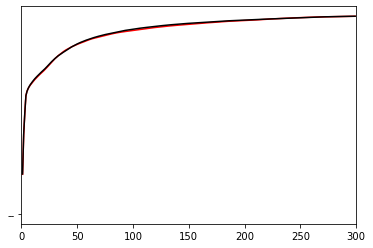

In [315]:
af_cdf_300 = np.cumsum(af_norm_300)
cdf_300 = np.cumsum(norm_300)
plt.plot(af_x, af_cdf_300, "r", "--")
plt.plot(x_300, cdf_300, "k")
plt.xlim(0,300)

# 3D Simulations

## 100

In [205]:
sim_100 = np.load("../data/simulations/3d/histogram_100_not_normed.npy", allow_pickle=True)
sim_mean_100 = np.mean(sim_100, axis=0)
norm_sim_100 = sim_mean_100 / np.sum(sim_mean_100)
sim_lb_100 = np.quantile(sim_100, q=0.05, axis=0)
sim_ub_100 = np.quantile(sim_100, q=0.95, axis=0)
norm_sim_lb_100 = sim_lb_100 / np.sum(sim_mean_100)
norm_sim_ub_100 = sim_ub_100 / np.sum(sim_mean_100)
sim_x_100 = np.linspace(1, 300, 300)[:-1]

[]

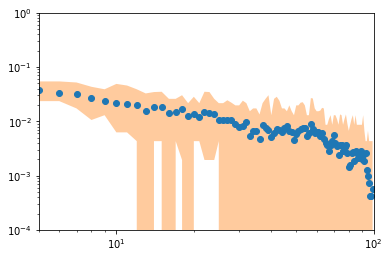

In [206]:
plt.scatter(sim_x_100, norm_sim_100)
plt.fill_between(sim_x_100, norm_sim_ub_100, norm_sim_lb_100, alpha=0.4, zorder=-1)
plt.xlim(5, 100)
plt.ylim(0.0001, 1)
plt.loglog()

In [207]:
sim_d_range_100 = np.arange(0.003, 0.0036, 0.0001)
sim_e_range_100 = np.arange(2, 4, 1)
sim_chain_100 = 100
sim_harmonic_100 = theory_functions.harmonic_number(sim_chain_100//2)
sim_weights_100 = norm_sim_ub_100 - norm_sim_lb_100
sim_params_100 = [sim_chain_100, sim_harmonic_100, sim_e_range_100[0], sim_d_range_100[1]]

[]

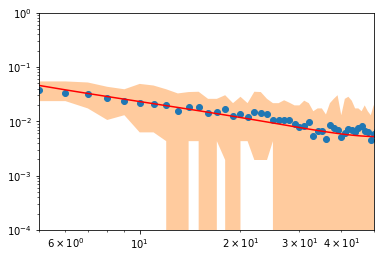

In [208]:
plt.plot(sim_x_100[4:50], theory_functions.amino_acid_distance_distribution(sim_x_100[4:50], *sim_params_100), c="r")
plt.scatter(sim_x_100, norm_sim_100)
plt.fill_between(sim_x_100, norm_sim_ub_100, norm_sim_lb_100, alpha=0.4, zorder=-1)
plt.xlim(5, 50)
plt.ylim(0.0001, 1)
plt.loglog()

# Curve fit

In [223]:
sim_parameters_100, sim_cov_100 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=sim_weights_100[4:50],
                                           xdata=sim_x_100[4:50], ydata=norm_sim_100[4:50],
        bounds=([sim_chain_100 - 1, sim_harmonic_100 - 0.00001, sim_e_range_100[0], sim_d_range_100[0]],
                [sim_chain_100, sim_harmonic_100, sim_e_range_100[1], sim_d_range_100[1]]))
print(sim_e_range_100[0], sim_d_range_100[0])
print(sim_e_range_100[1], sim_d_range_100[1])

2 0.003
3 0.0031


In [210]:
sim_sigma_100 = np.sqrt(np.diag(sim_cov_100))
sim_sigma_100 

array([1.90599849e+01, 1.76614742e+00, 7.15841984e-01, 6.24208796e-04])

In [211]:
print(f"chain: {sim_parameters_100[0]} \pm {sim_sigma_100[0]}, H_N/2: {sim_parameters_100[1]} \pm {sim_sigma_100[1]}, e: {sim_parameters_100[2]} \pm {sim_sigma_100[2]}, d: {sim_parameters_100[3]} \pm {sim_sigma_100[3]}")

chain: 99.99999999976271 \pm 19.059984904936677, H_N/2: 4.499195338329424 \pm 1.7661474194488058, e: 2.0000000000000004 \pm 0.7158419841773663, d: 0.003093752518626128 \pm 0.0006242087962840917


(0.001, 0.1)

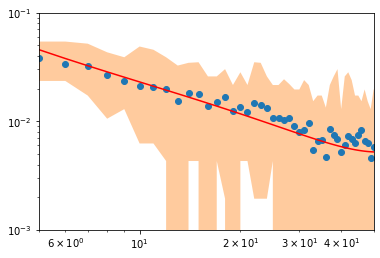

In [212]:
plt.scatter(sim_x_100[4:50], norm_sim_100[4:50])
plt.fill_between(sim_x_100, norm_sim_ub_100, norm_sim_lb_100, alpha=0.4, zorder=-1)
plt.plot(sim_x_100[4:50], theory_functions.amino_acid_distance_distribution(sim_x_100[4:50], *sim_parameters_100), c="r")
plt.loglog()
plt.xlim(5, 50)
plt.ylim(0.001, 0.1)

## 200

In [213]:
sim_200 = np.load("../data/simulations/3d/histogram_200_not_normed.npy", allow_pickle=True)
sim_mean_200 = np.mean(sim_200, axis=0)
norm_sim_200 = sim_mean_200 / np.sum(sim_mean_200)
sim_lb_200 = np.quantile(sim_200, q=0.05, axis=0)
sim_ub_200 = np.quantile(sim_200, q=0.95, axis=0)
norm_sim_lb_200 = sim_lb_200 / np.sum(sim_mean_200)
norm_sim_ub_200 = sim_ub_200 / np.sum(sim_mean_200)
sim_x_200 = np.linspace(1, 300, 300)[:-1]

[]

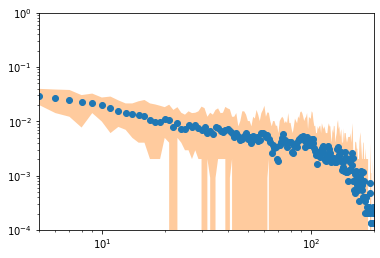

In [214]:
plt.scatter(sim_x_200, norm_sim_200)
plt.fill_between(sim_x_200, norm_sim_ub_200, norm_sim_lb_200, alpha=0.4, zorder=-1)
plt.xlim(5, 200)
plt.ylim(0.0001, 1)
plt.loglog()

In [215]:
sim_d_range_200 = np.arange(0.0010, 0.0030, 0.0001)
sim_e_range_200 = np.arange(0, 6, 1)
sim_chain_200 = 200
sim_harmonic_200 = theory_functions.harmonic_number(sim_chain_200//2)
sim_weights_200 = norm_sim_ub_200 - norm_sim_lb_200
sim_params_200 = [sim_chain_200, sim_harmonic_200, sim_e_range_200[0], sim_d_range_200[0]]

[]

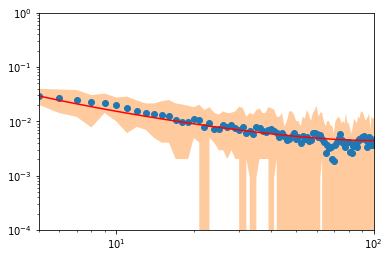

In [216]:
plt.plot(sim_x_200[4:100], theory_functions.amino_acid_distance_distribution(sim_x_200[4:100], *sim_params_200), c="r")
plt.scatter(sim_x_200, norm_sim_200)
plt.fill_between(sim_x_200, norm_sim_ub_200, norm_sim_lb_200, alpha=0.4, zorder=-1)
plt.xlim(5, 100)
plt.ylim(0.0001, 1)
plt.loglog()

In [224]:
sim_parameters_200, sim_cov_200 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=sim_weights_200[4:100],
                                           xdata=sim_x_200[4:100], ydata=norm_sim_200[4:100],
        bounds=([sim_chain_200 - 1, sim_harmonic_200 - 0.00001, sim_e_range_200[0], sim_d_range_200[0]],
                [sim_chain_200, sim_harmonic_200, sim_e_range_200[1], sim_d_range_200[1]]))
sim_sigma_200 = np.sqrt(np.diag(sim_cov_200))
print(sim_e_range_200[0], sim_d_range_200[0])
print(sim_e_range_200[1], sim_d_range_200[1])

0 0.001
1 0.0011


In [620]:
print(f"chain: {sim_parameters_200[0]} \pm {sim_sigma_200[0]}, H_N/2: {sim_parameters_200[1]} \pm {sim_sigma_200[1]}, e: {sim_parameters_200[2]} \pm {sim_sigma_200[2]}, d: {sim_parameters_200[3]} \pm {sim_sigma_200[3]}")

chain: 199.99999999992622 \pm 80.67459000914413, H_N/2: 5.187367517639622 \pm 0.9738815833589086, e: 0.6797407896250285 \pm 1.0914963904475918, d: 0.0010999999999940172 \pm 0.0004965421196257304


(0.001, 0.1)

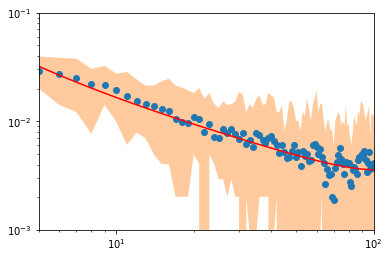

In [483]:
plt.scatter(sim_x_200[4:100], norm_sim_200[4:100])
plt.fill_between(sim_x_200, norm_sim_ub_200, norm_sim_lb_200, alpha=0.4, zorder=-1)
plt.plot(sim_x_200[4:100], theory_functions.amino_acid_distance_distribution(sim_x_200[4:100], *sim_parameters_200), c="r")
plt.loglog()
plt.xlim(5, 100)
plt.ylim(0.001, 0.1)

# 300

In [227]:
sim_300 = np.load("../data/simulations/3d/histogram_300_not_normed.npy", allow_pickle=True)
sim_mean_300 = np.mean(sim_300, axis=0)
norm_sim_300 = sim_mean_300 / np.sum(sim_mean_300)
sim_lb_300 = np.quantile(sim_300, q=0.05, axis=0)
sim_ub_300 = np.quantile(sim_300, q=0.95, axis=0)
norm_sim_lb_300 = sim_lb_300 / np.sum(sim_mean_300)
norm_sim_ub_300 = sim_ub_300 / np.sum(sim_mean_300)
sim_x_300 = np.linspace(1, 300, 300)[:-1]

[]

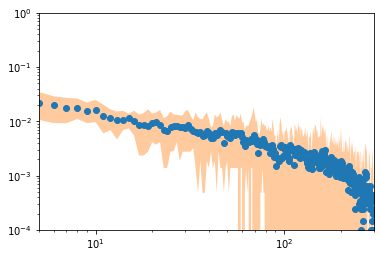

In [228]:
plt.scatter(sim_x_300, norm_sim_300)
plt.fill_between(sim_x_300, norm_sim_ub_300, norm_sim_lb_300, alpha=0.4, zorder=-1)
plt.xlim(5, 300)
plt.ylim(0.0001, 1)
plt.loglog()

In [229]:
sim_d_range_300 = np.arange(0.0001, 0.0030, 0.0001)
sim_e_range_300 = np.arange(0, 6, 1)
sim_chain_300 = 300
sim_harmonic_300 = theory_functions.harmonic_number(sim_chain_300//2)
sim_weights_300 = norm_sim_ub_300 - norm_sim_lb_300
sim_params_300 = [sim_chain_300, sim_harmonic_300, sim_e_range_300[1], sim_d_range_300[6]]

[]

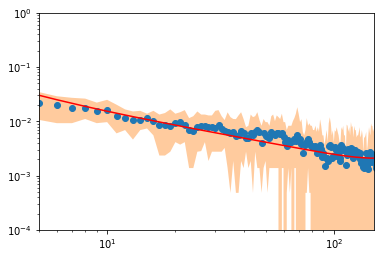

In [230]:
plt.plot(sim_x_300[4:150], theory_functions.amino_acid_distance_distribution(sim_x_300[4:150], *sim_params_300), c="r")
plt.scatter(sim_x_300, norm_sim_300)
plt.fill_between(sim_x_300, norm_sim_ub_300, norm_sim_lb_300, alpha=0.4, zorder=-1)
plt.xlim(5, 150)
plt.ylim(0.0001, 1)
plt.loglog()

In [231]:
sim_parameters_300, sim_cov_300 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=sim_weights_300[4:150],
                                           xdata=sim_x_300[4:150], ydata=norm_sim_300[4:150],
        bounds=([sim_chain_300 - 1, sim_harmonic_300 - 0.00001, sim_e_range_300[0], sim_d_range_300[5]],
                [sim_chain_300, sim_harmonic_300, sim_e_range_300[1], sim_d_range_300[6]]))
sim_sigma_300 = np.sqrt(np.diag(sim_cov_300))
print(sim_e_range_300[0], sim_d_range_300[5])
print(sim_e_range_300[1], sim_d_range_300[6])

0 0.0006000000000000001
1 0.0007000000000000001


In [532]:
print(f"chain: {sim_parameters_300[0]} \pm {sim_sigma_300[0]}, H_N/2: {sim_parameters_300[1]} \pm {sim_sigma_300[1]}, e: {sim_parameters_300[2]} \pm {sim_sigma_300[2]}, d: {sim_parameters_300[3]} \pm {sim_sigma_300[3]}")

chain: 299.99999999999864 \pm 89.19361431142097, H_N/2: 5.5911705886439105 \pm 1.0074594247949915, e: 0.9088287564911117 \pm 1.0355774586248272, d: 0.0006991172331883311 \pm 0.0002442299472154607


(0.001, 0.1)

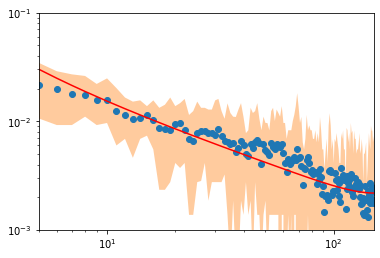

In [533]:
plt.scatter(sim_x_300[4:150], norm_sim_300[4:150])
plt.fill_between(sim_x_300, norm_sim_ub_300, norm_sim_lb_300, alpha=0.4, zorder=-1)
plt.plot(sim_x_300[4:150], theory_functions.amino_acid_distance_distribution(sim_x_300[4:150], *sim_parameters_300), c="r")
plt.loglog()
plt.xlim(5, 150)
plt.ylim(0.001, 0.1)

# 2D Simulations

In [233]:
import pandas as pd
sim_2d_100 = pd.read_csv("../data/simulations/2d/simulation_stats.csv")
sim_2d_mean_100 = sim_2d_100["mean"].to_numpy()
norm_sim_2d_100 = sim_2d_mean_100 / np.sum(sim_2d_mean_100)
sim_2d_lb_100 = sim_2d_100["lower_bound"].to_numpy()
sim_2d_ub_100 = sim_2d_100["upper_bound"].to_numpy()
norm_sim_2d_lb_100 = sim_2d_lb_100 / np.sum(sim_2d_mean_100)
norm_sim_2d_ub_100 = sim_2d_ub_100 / np.sum(sim_2d_mean_100)
sim_2d_x_100 = sim_2d_100["variable"].to_numpy()

[]

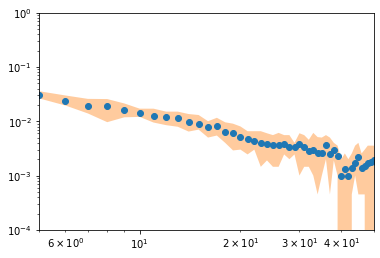

In [234]:
plt.scatter(sim_2d_x_100, norm_sim_2d_100)
plt.fill_between(sim_2d_x_100, norm_sim_2d_ub_100, norm_sim_2d_lb_100, alpha=0.4, zorder=-1)
plt.xlim(5, 50)
plt.ylim(0.0001, 1)
plt.loglog()

In [235]:
sim_2d_d_range_100 = np.arange(0.001, 0.0026, 0.0001)
sim_2d_e_range_100 = np.arange(0, 6, 1)
sim_2d_chain_100 = 100
sim_2d_harmonic_100 = theory_functions.harmonic_number(sim_2d_chain_100//2)
sim_2d_weights_100 = norm_sim_2d_ub_100 - norm_sim_2d_lb_100
sim_2d_params_100 = [sim_2d_chain_100, sim_2d_harmonic_100, sim_2d_e_range_100[4], sim_2d_d_range_100[9]]

[]

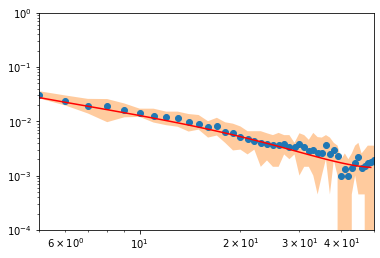

In [236]:
plt.plot(sim_2d_x_100[4:50], theory_functions.amino_acid_distance_distribution(sim_2d_x_100[4:50], *sim_2d_params_100), c="r")
plt.scatter(sim_2d_x_100, norm_sim_2d_100)
plt.fill_between(sim_2d_x_100, norm_sim_2d_ub_100, norm_sim_2d_lb_100, alpha=0.4, zorder=-1)
plt.xlim(5, 50)
plt.ylim(0.0001, 1)
plt.loglog()

In [237]:
sim_2d_parameters_100, sim_2d_cov_100 = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=sim_2d_weights_100[4:50],
                                           xdata=sim_2d_x_100[4:50], ydata=norm_sim_2d_100[4:50],
        bounds=([sim_2d_chain_100 - 1, sim_2d_harmonic_100 - 0.00001, sim_2d_e_range_100[3], sim_2d_d_range_100[8]],
                [sim_2d_chain_100, sim_2d_harmonic_100, sim_2d_e_range_100[4], sim_2d_d_range_100[9]]))
print(sim_2d_e_range_100[3], sim_2d_d_range_100[8])
print(sim_2d_e_range_100[4], sim_2d_d_range_100[9])


3 0.0018000000000000004
4 0.0019000000000000004


In [586]:
sim_2d_sigma_100 = np.sqrt(np.diag(sim_2d_cov_100))
sim_2d_sigma_100 

array([1.99379114e+01, 1.35330506e+00, 7.24285373e-01, 2.93918320e-04])

In [587]:
print(f"chain: {sim_2d_parameters_100[0]} \pm {sim_2d_sigma_100[0]}, H_N/2: {sim_2d_parameters_100[1]} \pm {sim_2d_sigma_100[1]}, e: {sim_2d_parameters_100[2]} \pm {sim_2d_sigma_100[2]}, d: {sim_2d_parameters_100[3]} \pm {sim_2d_sigma_100[3]}")

chain: 99.99999999999999 \pm 19.937911386884856, H_N/2: 4.499195338329424 \pm 1.3533050552413093, e: 3.6106619733346768 \pm 0.7242853733452995, d: 0.0019000000000000002 \pm 0.0002939183201845826


(0.001, 0.1)

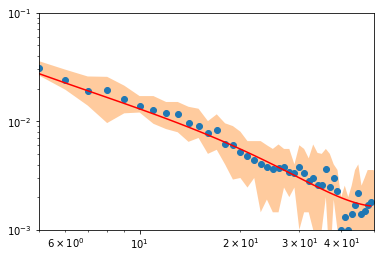

In [588]:
plt.scatter(sim_2d_x_100[4:50], norm_sim_2d_100[4:50])
plt.fill_between(sim_2d_x_100, norm_sim_2d_ub_100, norm_sim_2d_lb_100, alpha=0.4, zorder=-1)
plt.plot(sim_2d_x_100[4:50], theory_functions.amino_acid_distance_distribution(sim_2d_x_100[4:50], *sim_2d_parameters_100), c="r")
plt.loglog()
plt.xlim(5, 50)
plt.ylim(0.001, 0.1)

## 200

[]

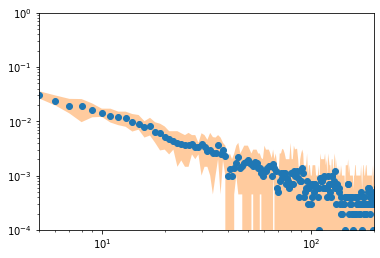

In [593]:
sim_2d_200 = pd.read_csv("../data/simulations/2d/simulation_stats.csv")
sim_2d_mean_200 = sim_2d_200["mean"].to_numpy()
norm_sim_2d_200 = sim_2d_mean_200 / np.sum(sim_2d_mean_200)
sim_2d_lb_200 = sim_2d_200["lower_bound"].to_numpy()
sim_2d_ub_200 = sim_2d_200["upper_bound"].to_numpy()
norm_sim_2d_lb_200 = sim_2d_lb_200 / np.sum(sim_2d_mean_200)
norm_sim_2d_ub_200 = sim_2d_ub_200 / np.sum(sim_2d_mean_200)
sim_2d_x_200 = sim_2d_200["variable"].to_numpy()
plt.scatter(sim_2d_x_200, norm_sim_2d_200)
plt.fill_between(sim_2d_x_200, norm_sim_2d_ub_200, norm_sim_2d_lb_200, alpha=0.4, zorder=-1)
plt.xlim(5, 200)
plt.ylim(0.0001, 1)
plt.loglog()

[]

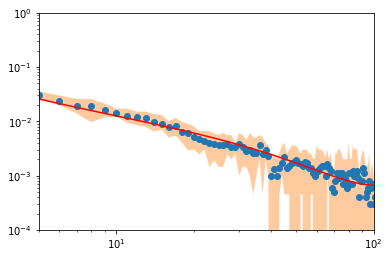

In [600]:
sim_2d_d_range_200 = np.arange(0.0001, 0.002, 0.0001)
sim_2d_e_range_200 = np.arange(0, 6, 1)
sim_2d_chain_200 = 200
sim_2d_harmonic_200 = theory_functions.harmonic_number(sim_2d_chain_200//2)
sim_2d_weights_200 = norm_sim_2d_ub_200 - norm_sim_2d_lb_200
sim_2d_params_200 = [sim_2d_chain_200, sim_2d_harmonic_200, sim_2d_e_range_200[4], sim_2d_d_range_200[8]]
plt.plot(sim_2d_x_200[4:100], theory_functions.amino_acid_distance_distribution(sim_2d_x_200[4:100], *sim_2d_params_200), c="r")
plt.scatter(sim_2d_x_200, norm_sim_2d_200)
plt.fill_between(sim_2d_x_200, norm_sim_2d_ub_200, norm_sim_2d_lb_200, alpha=0.4, zorder=-1)
plt.xlim(5, 100)
plt.ylim(0.0001, 1)
plt.loglog()

# Curve fit

[]

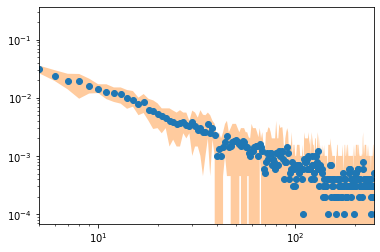

In [265]:
sim_2d = pd.read_csv("../data/simulations/2d/simulation_stats.csv")
sim_2d_mean = sim_2d["mean"].to_numpy()
norm_sim_2d = sim_2d_mean / np.sum(sim_2d_mean)
sim_2d_lb = sim_2d["lower_bound"].to_numpy()
sim_2d_ub = sim_2d["upper_bound"].to_numpy()
norm_sim_2d_lb = sim_2d_lb / np.sum(sim_2d_mean)
norm_sim_2d_ub = sim_2d_ub / np.sum(sim_2d_mean)
sim_2d_x = sim_2d["variable"].to_numpy()
plt.scatter(sim_2d_x, norm_sim_2d)
plt.fill_between(sim_2d_x, norm_sim_2d_ub, norm_sim_2d_lb, alpha=0.4, zorder=-1)
plt.xlim(5, 250)
# plt.ylim(0.0001, 0.1)
plt.loglog()

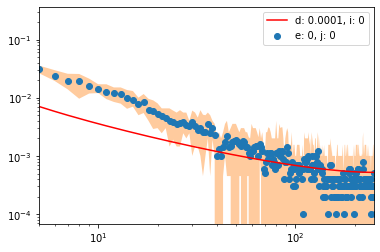

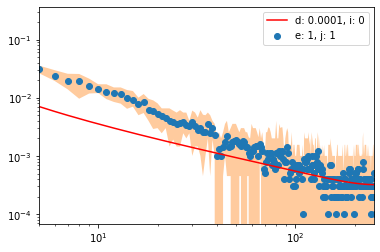

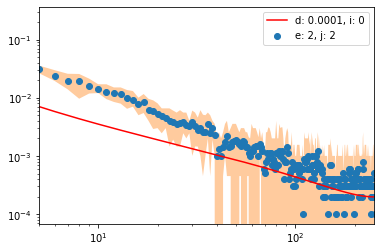

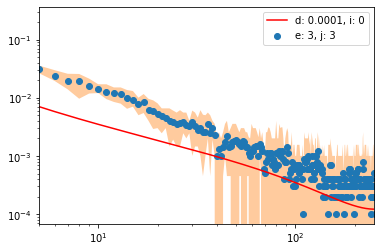

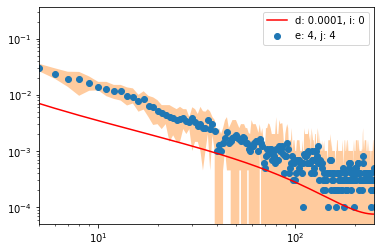

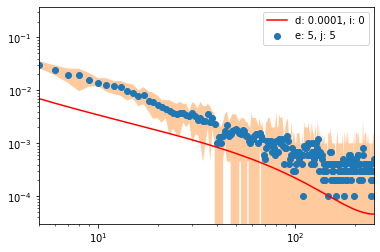

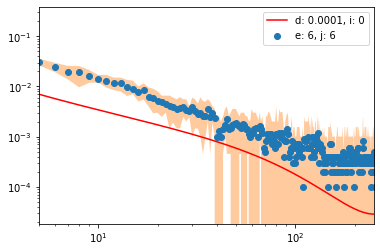

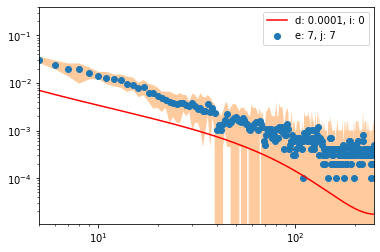

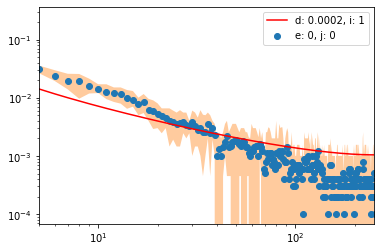

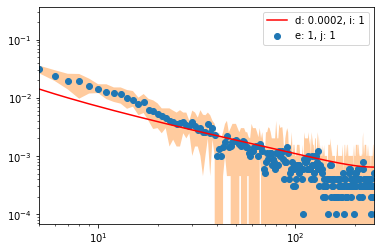

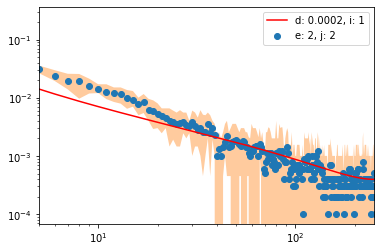

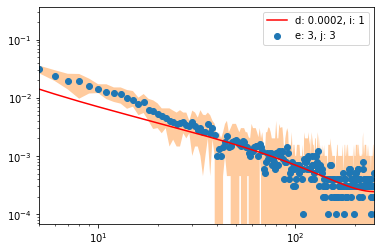

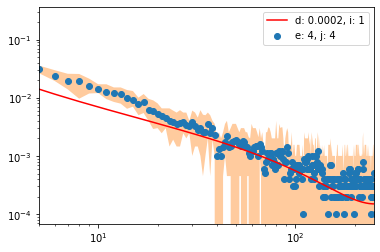

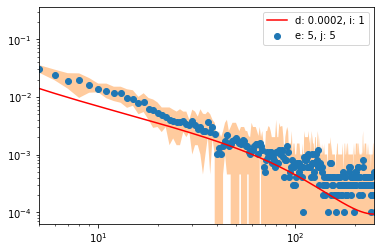

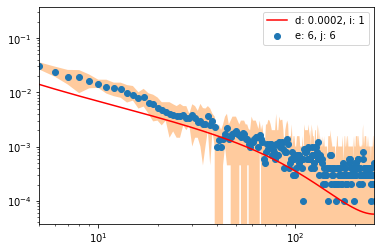

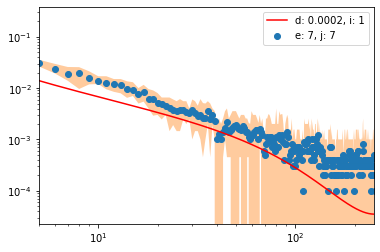

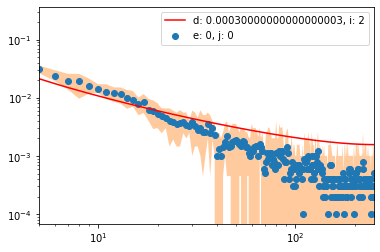

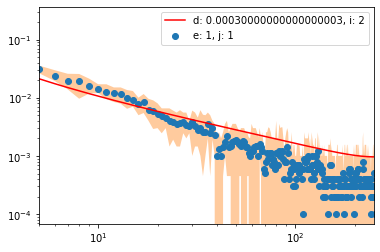

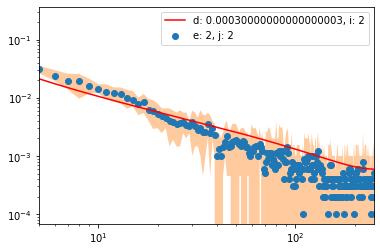

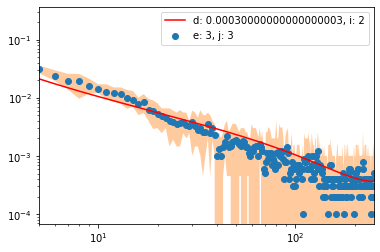

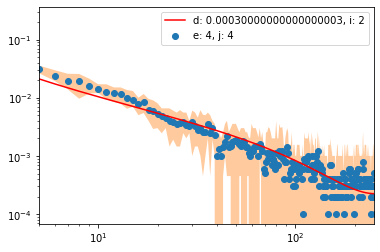

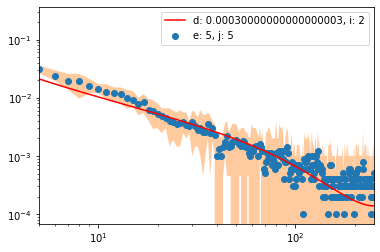

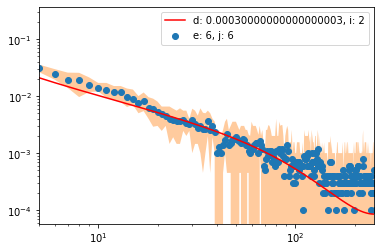

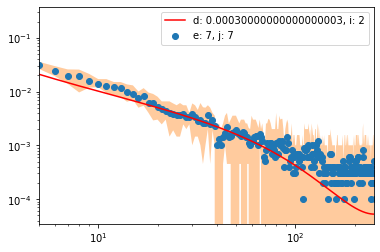

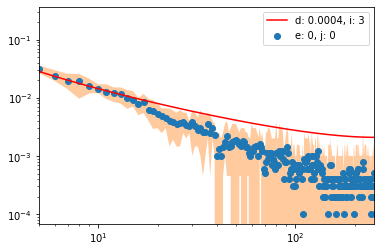

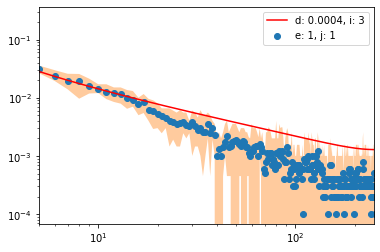

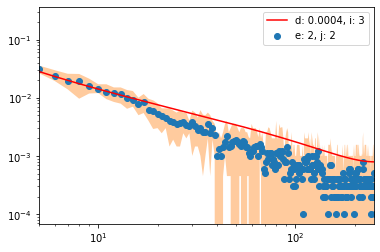

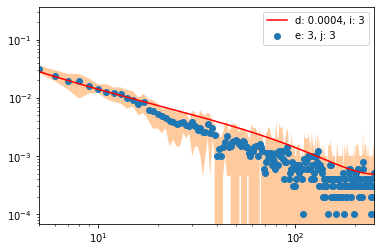

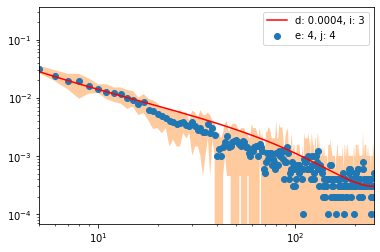

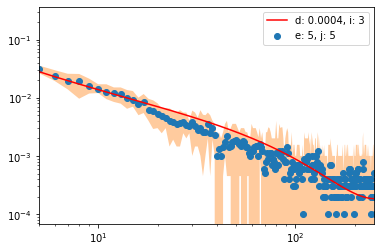

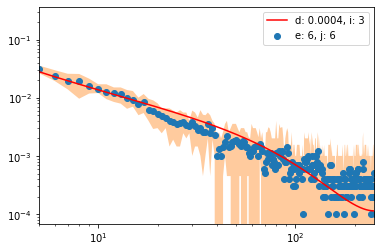

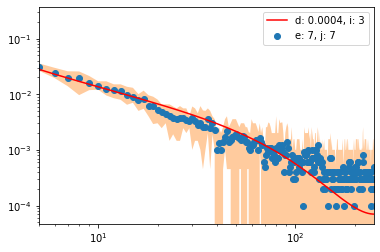

In [286]:
sim_2d_d_range = np.arange(0.0001, 0.0005, 0.0001)
sim_2d_e_range = np.arange(0, 8, 1)
sim_2d_chain = 500
sim_2d_harmonic = theory_functions.harmonic_number(sim_2d_chain//2)
sim_2d_weights = norm_sim_2d_ub - norm_sim_2d_lb

for i in range(len(sim_2d_d_range)):
    for j in range(len(sim_2d_e_range)):
        sim_2d_params = [sim_2d_chain, sim_2d_harmonic, sim_2d_e_range[j], sim_2d_d_range[i]]   
        plt.plot(sim_2d_x[4:250], theory_functions.amino_acid_distance_distribution(sim_2d_x[4:250], *sim_2d_params), c="r", label=f"d: {sim_2d_d_range[i]}, i: {i}")
        plt.scatter(sim_2d_x, norm_sim_2d, label=f"e: {sim_2d_e_range[j]}, j: {j}")
        plt.fill_between(sim_2d_x, norm_sim_2d_ub, norm_sim_2d_lb, alpha=0.4, zorder=-1)
        plt.xlim(5, 250)
        # plt.ylim(0.1, 100)
        plt.loglog()
        plt.legend()
        plt.show()

# plt.plot(sim_2d_x[4:250], theory_functions.amino_acid_distance_distribution(sim_2d_x[4:250], *sim_2d_params), c="r")
# plt.scatter(sim_2d_x, norm_sim_2d)
# plt.fill_between(sim_2d_x, norm_sim_2d_ub, norm_sim_2d_lb, alpha=0.4, zorder=-1)
# plt.xlim(5, 250)
# # plt.ylim(0.0001, 1)
# plt.loglog()

# Curve fit

In [291]:
sim_2d_parameters, sim_2d_cov = scipy.optimize.curve_fit(f=theory_functions.amino_acid_distance_distribution,
                                           sigma=sim_2d_weights[4:250],
                                           xdata=sim_2d_x[4:250], ydata=norm_sim_2d[4:250],
        bounds=([sim_2d_chain - 1, sim_2d_harmonic - 0.00001, sim_2d_e_range[6], sim_2d_d_range[1]],
                [sim_2d_chain, sim_2d_harmonic, sim_2d_e_range[7], sim_2d_d_range[2]]))
print(sim_2d_e_range[6], sim_2d_d_range[1])
print(sim_2d_e_range[7], sim_2d_d_range[2])

6 0.0002
7 0.00030000000000000003


In [288]:
sim_2d_sigma = np.sqrt(np.diag(sim_2d_cov))
sim_2d_sigma 

array([1.06703720e+02, 1.12857274e+00, 1.13425886e+00, 5.64687601e-05])

In [289]:
print(f"chain: {sim_2d_parameters[0]} \pm {sim_2d_sigma[0]}, H_N/2: {sim_2d_parameters[1]} \pm {sim_2d_sigma[1]}, e: {sim_2d_parameters[2]} \pm {sim_2d_sigma[2]}, d: {sim_2d_parameters[3]} \pm {sim_2d_sigma[3]}")

chain: 499.9999999999975 \pm 106.70372019904556, H_N/2: 6.100675249432578 \pm 1.1285727413474806, e: 6.0000000000021005 \pm 1.134258860631872, d: 0.00029999999999991915 \pm 5.646876008686153e-05


(0.0001, 0.1)

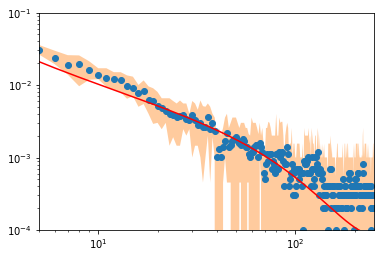

In [290]:
plt.scatter(sim_2d_x[4:250], norm_sim_2d[4:250])
plt.fill_between(sim_2d_x, norm_sim_2d_ub, norm_sim_2d_lb, alpha=0.4, zorder=-1)
plt.plot(sim_2d_x[4:250], theory_functions.amino_acid_distance_distribution(sim_2d_x[4:250], *sim_2d_parameters), c="r")
plt.loglog()
plt.xlim(5, 250)
plt.ylim(0.0001, 0.1)